## Isoprofit Lines

$$
\Pi(Q) = P \cdot Q - C(Q)
$$

So for any profit level $\bar \Pi$

$$
P = \frac{\bar \Pi}{Q} + AC(Q)
$$

For example if 

$$
TC(Q) = F + c \cdot Q  + d \cdot Q^2 \\ 
MC(Q) = c + d \dot Q \\
AC(Q) = \frac{F}{Q} + c + d\cdot Q
$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, fixed, IntSlider, HBox, VBox
import ipywidgets as widgets
import seaborn as sns

In [2]:
def TC(Q, F=10, c=1, d=0):
    return F + c*Q + d*Q**2 


def AC(Q, F=10, c=1, d=0):
    return F/Q + c + d*Q 

def MC(Q, F=10, c=1, d=0):
    return c + 2*d*Q 

def AR(Q, A=30, b=1):
    return A - b*Q

def MR(Q, A=30, b=1):
    return A - 2*b*Q

def profit(Q, F=50, c=1, d=0.1, A=30, b=1):
    P = AR(Q,A, b)
    return P*Q - TC(Q, F, c, d)

def isoprofit(Q, Pi=0, F=10, c=1, d=0):
    return Pi/Q + AC(Q,F,c,d) 

In [3]:
q = np.linspace(0.1,100, 1000)


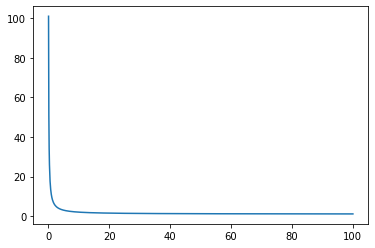

In [4]:
plt.plot(q,AC(q))

In [5]:
def plotC(Pi=0, F=50, c=1, d=0.1, A=30, b=1, opt=False, mr = False):
    f, ax = plt.subplots(figsize=(8,5))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel("Q", fontsize=16)
    ax.set_ylabel("P", fontsize=16)

    ax.plot(q, AC(q, F, c, d), linewidth=3)
    ax.text(90, AC(90, F, c, d)-1.25,'AC', fontsize=16)
        
    ax.plot(q, MC(q, F, c, d), linewidth=3)
    ax.text(90, MC(90, F, c, d)+1,'MC', fontsize=16)
    
    ax.plot(q, isoprofit(q, Pi, F, c, d))
    #ax.text(70, isoprofit(70, Pi, F, c, d), r'$\bar \Pi=$'+str(Pi))
    
    ax.set_xlim(0,np.max(q))
    ax.set_ylim(0,30)
    ax.plot(q, AR(q, A, b),linewidth=3 )
    ax.plot(q, AR(q,A,b), linestyle=':')
    d2 = (A-2)/b  # to plot D text
    ax.text(d2, AR(d2, A, b), 'D', fontsize=16)
    
    qe = (A-c)/(2*b+2*d)
    qc = (A-c)/(b+2*d)
    ARe = AR(qe, A, b)
    ACe = AC(qe, F, c, d)
    profite = profit(qe, F, c, d, A, b)
    if opt:
        ax.vlines(x=qe, ymin = 0, ymax = ARe, linestyle=':')
        ax.hlines(y=ARe, xmin = 0, xmax = qe, linestyle=':')
        ax.hlines(y=ACe, xmin = 0, xmax = qe, linestyle=':')
        ax.plot(q, isoprofit(q, profite, F, c, d))
        ax.fill_between(q, ARe, ACe, where=q <= qe, 
                         facecolor='green', alpha=0.2, label='Profit')
        ax.fill_between(q, AR(q, A, b), MC(q, F, c, d), where= (q <= qc) & (q>qe), 
                         facecolor='blue', alpha=0.2, label='DWL')
        ax.legend()
    if mr:
        ax.plot(q, MR(q, A, b), linestyle=':')
    
    

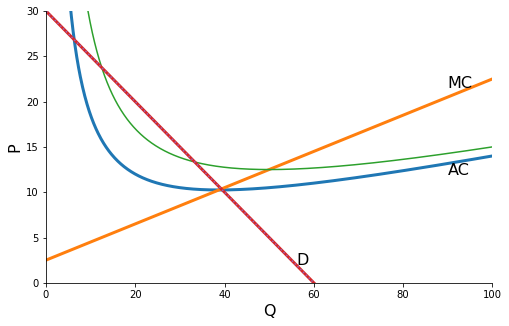

In [6]:
plotC(Pi=100, F=150, c=2.5, d=0.1, A=30, b=0.5,opt=False)


In [7]:
interact(plotC, Pi=(0,400,1), F=(0,200,1), c=(0,3,0.1), d=(0,2,0.01), b=(0.1,2,0.1));

interactive(children=(IntSlider(value=0, description='Pi', max=400), IntSlider(value=50, description='F', max=…

In [8]:
TC(20,F=100,c=0,d=0.1)

140.0

The sliders are vertically stacked which takes up too much room, so let's rearrange to make things take up less real estate.

In [9]:
func = widgets.interactive(plotC, Pi=(0,400,1), F=(0,200,1), c=(0,3,0.1), d=(0,2,0.01), b=(0.1,2,0.1))
controls = HBox(func.children[:-1], layout = widgets.Layout(flex_flow='row wrap'))
output = func.children[-1]

In [10]:
display(VBox([controls, output]))